In [1]:
## Importing the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Setting directory (file path) to access dataset
data_dir=r"C:\Users\Ishita Malhotra\Downloads\IPBA Sessions\Classification and Regression Trees"
os.chdir(data_dir)

In [3]:
#Importing the dataset
dataset = pd.read_csv('credit_history.csv')

In [4]:
dataset.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [5]:
#Data audit
dataset.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [6]:
dataset['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [7]:
#Data CLeaning
dataset['years'].fillna(4,inplace=True)

In [8]:
X=dataset.drop("default",axis=1)

In [9]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [10]:
X=pd.get_dummies(X)

In [11]:
X.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [12]:
Y=dataset['default']

In [13]:
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 200)

In [15]:
print(X_train)

      amount  years    income  age  grade_A  grade_B  grade_C  grade_D  \
773     1500   22.0   32304.0   24        0        1        0        0   
5290   15000   18.0   78840.0   39        0        1        0        0   
1692    3500    3.0   30000.0   22        0        0        1        0   
2478    8400    1.0   36000.0   23        1        0        0        0   
3138    6000   16.0   77000.0   20        1        0        0        0   
...      ...    ...       ...  ...      ...      ...      ...      ...   
2858   17000    0.0   65000.0   26        0        0        1        0   
5956    2500    2.0   40000.0   22        0        0        1        0   
784     7000    4.0   39120.0   23        0        1        0        0   
4713    7000   12.0   50000.0   24        0        1        0        0   
1818    5600   14.0  120000.0   26        0        0        1        0   

      grade_E  grade_F  grade_G  ownership_MORTGAGE  ownership_OTHER  \
773         0        0        0        

In [17]:
print(X_test)

      amount  years    income  age  grade_A  grade_B  grade_C  grade_D  \
6916    3000    1.0   64170.0   22        1        0        0        0   
2306    2300    0.0   78000.0   24        1        0        0        0   
2459    9000    4.0  200000.0   31        1        0        0        0   
7386    2500    5.0   22406.0   26        1        0        0        0   
2230   12000    9.0   52000.0   24        1        0        0        0   
...      ...    ...       ...  ...      ...      ...      ...      ...   
1315   13275    4.0   38040.0   30        0        0        1        0   
7500   10000    4.0   36000.0   24        0        0        0        1   
1052    7000    0.0   25000.0   22        0        0        1        0   
3225    3000    8.0   58704.0   26        0        1        0        0   
1239   14100    5.0   51900.0   22        0        1        0        0   

      grade_E  grade_F  grade_G  ownership_MORTGAGE  ownership_OTHER  \
6916        0        0        0        

In [16]:
print(Y_train)

773     1
5290    0
1692    1
2478    1
3138    0
       ..
2858    0
5956    1
784     0
4713    0
1818    0
Name: default, Length: 6181, dtype: int64


In [18]:
print(Y_test)

6916    1
2306    1
2459    1
7386    1
2230    1
       ..
1315    1
7500    1
1052    0
3225    1
1239    0
Name: default, Length: 1546, dtype: int64


In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3, random_state = 200)
classifier.fit(X_train, Y_train)
classifier.score(X_test, Y_test)

0.6274256144890039

In [20]:
#Area under ROC curve
import sklearn.metrics
sklearn.metrics.roc_auc_score(Y_test,classifier.predict_proba(X_test)[:,1])

0.6721250820352787

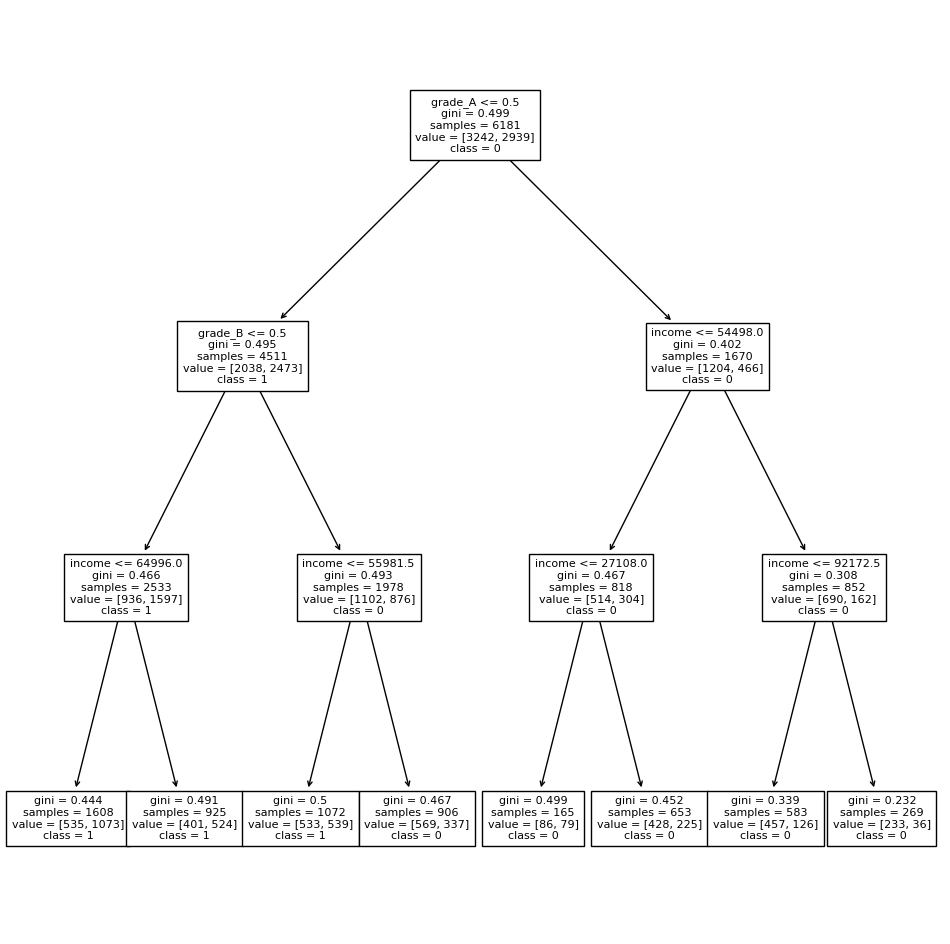

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
sklearn.tree.plot_tree(classifier, feature_names=X.columns,class_names=['0','1'], fontsize=8)
plt.show()

In [22]:
classifier['X_test']

TypeError: 'DecisionTreeClassifier' object is not subscriptable